Authors: Matthew Buensalida, Alenna Cayton, Joaquin Escarraga

Section: S11

# Spotify Song Genre Classification

In this notebook, several models will be tried:

1. Gaussian Naive Bayes
2. Logistic Regression
3. Random Forest


# Dataset

The dataset **Spotify Tracks DB** contains songs from spotify including 26 genres with a total of 232,725 tracks.

Link to Kaggle dataset: https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db?fbclid=IwAR1ScyhFIzpafp-jl9bO7gdKWoQ1cyDKDYzPPLRC85GamjA898nwBHEOp8s


The dataset contains 232,725 **observations** (rows) which each represent a song across 18 **variables** (columns). The following are the descriptions of each variable in the dataset.

- **`genre`**: genre of the song (string)
- **`artist_name`**: artist of the song (string)
- **`track_name`**: name of track (string)
- **`track_id`**: id of track (string)
- **`popularity`**: popularity of track represented by an integer
- **`acousticness`**: confidence measure of acousticness
- **`danceability`**: suitability of a track for dancing based on a combination of tempo, rythm, stability, beat strengthm and regularity.
- **`duration_ms`**: duration ms of the track
- **`energy`**: confidence measure of energy representing a perceptual measure of intensity and activity
- **`instrumentalness`**: confidence measure of instrumentalness
- **`key`**: key of track
- **`liveness`**: confidence measure of liveness
- **`loudness`**: loudness of track (LUFS)
- **`mode`**: mode of track
- **`speechiness`**: confidence measure of speechiness
- **`tempo`**: BPM of track
- **`time_signature`**: time signature of track
- **`valence`**: confidence measure of valence 

# Reading the Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Read CSV file.

In [2]:
df = pd.read_csv('SpotifyFeatures.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

# Exploratory Data Analysis

Let us do a simple exploration with the data and see what we can find.

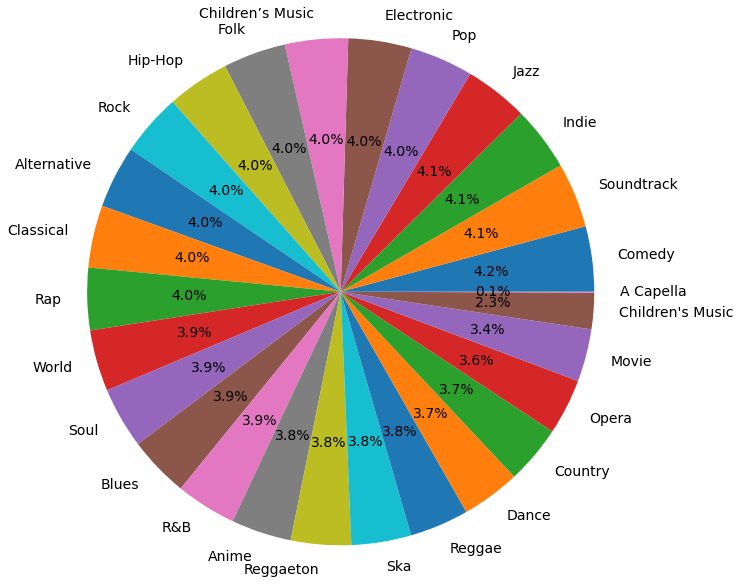

In [4]:
# Find percent of each genre
df_genre = df['genre'].value_counts() / len(df)
sizes = df_genre.values.tolist()
labels = df_genre.index.values.tolist()

# Pie chart for genre
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
plt.show()


The chart above shows how evenly distributed the genres are in the dataset.

**Is there a correlation between the song attributes in the dataset?**

To answer this question, we can observe the correlation matrix. This is a commonly used tool to gain a better understanding of how much the variables are related to each other. 


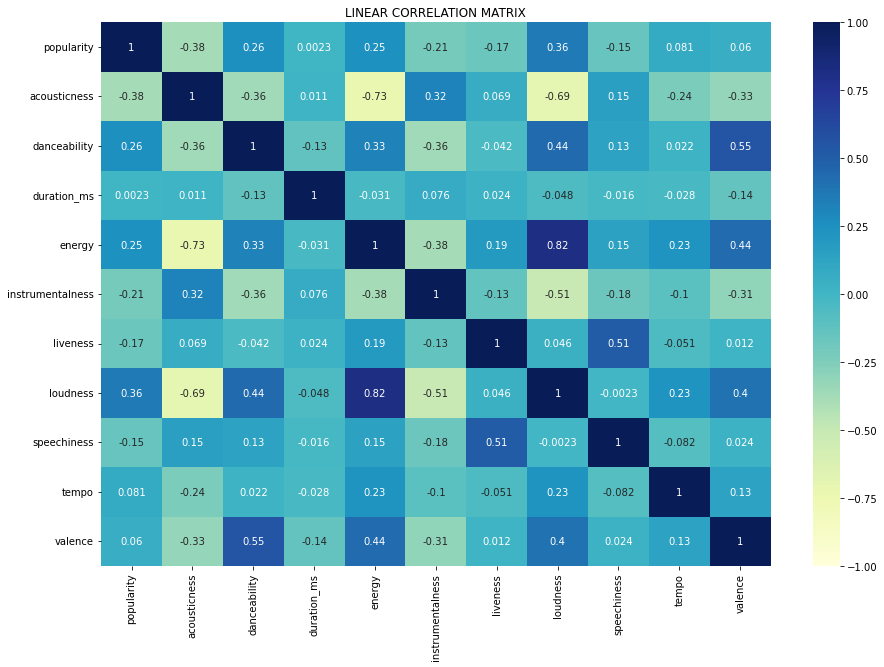

In [5]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.title('LINEAR CORRELATION MATRIX')
plt.show()

Upon observation of the linear correlation matrix, there seems to be a strong positive correlation between `loudness ` and `energy ` with a correlation coefficient of 0.82

**Are there certain song attributes that stand out per genre?**

To answer this question, we will compare the song attribute values using their mean values per genre. 

In [6]:
df[['genre','popularity']].groupby('genre').mean().sort_values(by='popularity', ascending=False)[:26]

,popularity
genre,
Pop,66.590667
Rap,60.533795
Rock,59.619392
Hip-Hop,58.423131
Dance,57.275256
Indie,54.701561
Children’s Music,54.659040
R&B,52.308719
Alternative,50.213430


In [7]:
df[['genre','acousticness']].groupby('genre').mean().sort_values(by='acousticness', ascending=False)[:26]

,acousticness
genre,
Opera,0.945202
Classical,0.868843
A Capella,0.829941
Comedy,0.793098
Soundtrack,0.717349
Movie,0.697341
Children's Music,0.591781
Jazz,0.499606
Folk,0.463201


In [8]:
df[['genre','danceability']].groupby('genre').mean().sort_values(by='danceability', ascending=False)[:26]

,danceability
genre,
Reggaeton,0.731260
Hip-Hop,0.718808
Reggae,0.699271
Children's Music,0.697475
Rap,0.697244
R&B,0.642125
Pop,0.640236
Dance,0.638191
Electronic,0.619542


In [9]:
df[['genre','duration_ms']].groupby('genre').mean().sort_values(by='duration_ms', ascending=False)[:26]

,duration_ms
genre,
World,315327.891931
Classical,310339.983578
Electronic,269195.980164
Jazz,265645.269887
Opera,259161.092271
Blues,251931.826000
Reggae,239503.539391
Rock,237003.226920
Folk,235805.456608


In [10]:
df[['genre','energy']].groupby('genre').mean().sort_values(by='energy', ascending=False)[:26]

,energy
genre,
Ska,0.815585
Reggaeton,0.748836
Electronic,0.739299
Alternative,0.711519
Children’s Music,0.706616
Dance,0.698067
Rock,0.683670
Comedy,0.676094
Anime,0.665356


In [11]:
df[['genre','instrumentalness']].groupby('genre').mean().sort_values(by='instrumentalness', ascending=False)[:26]

,instrumentalness
genre,
Soundtrack,0.783611
Classical,0.599425
Jazz,0.358009
Electronic,0.350955
Anime,0.280592
World,0.233882
Opera,0.232013
Children's Music,0.143572
Movie,0.125427


In [12]:
df[['genre','liveness']].groupby('genre').mean().sort_values(by='liveness', ascending=False)[:26]

,liveness
genre,
Comedy,0.724775
Ska,0.243473
Blues,0.233125
Movie,0.228715
World,0.227793
Opera,0.223264
Electronic,0.210006
Reggaeton,0.207510
Hip-Hop,0.201146


In [13]:
df[['genre','loudness']].groupby('genre').mean().sort_values(by='loudness', ascending=False)[:26]

,loudness
genre,
Reggaeton,-5.875960
Dance,-6.054241
Ska,-6.172705
Pop,-6.495423
Children’s Music,-6.526668
Alternative,-6.540803
Rap,-6.669916
Hip-Hop,-6.860286
Electronic,-7.035868


In [14]:
df[['genre','speechiness']].groupby('genre').mean().sort_values(by='speechiness', ascending=False)[:26]

,speechiness
genre,
Comedy,0.853532
Hip-Hop,0.205396
Rap,0.188186
Reggaeton,0.127616
R&B,0.120994
Children's Music,0.117279
Reggae,0.116163
Movie,0.109400
Pop,0.107963


In [15]:
df[['genre','tempo']].groupby('genre').mean().sort_values(by='tempo', ascending=False)[:26]

,tempo
genre,
Ska,129.427622
Anime,126.629156
Electronic,125.845967
Country,123.414419
Rock,122.629630
Alternative,122.534485
Children’s Music,121.931104
Pop,121.175844
Blues,121.137637


In [16]:
df[['genre','valence']].groupby('genre').mean().sort_values(by='valence', ascending=False)[:26]

,valence
genre,
Reggae,0.679665
Children's Music,0.675956
Reggaeton,0.659439
Ska,0.653472
Blues,0.579425
Country,0.535160
Dance,0.517754
Rock,0.517113
Jazz,0.508961


**Findings:**

The genres below lead the following song attributes:

**Reggaeton**
- Loudness (avg: -5.88)
- Danceability (avg: 0.73)

**Comedy** 
- Liveness (avg: 0.72)
- Speechiness (avg: 0.85)

**Ska**
- Tempo (avg: 129.43)
- Energy (avg: 0.82)

**Reggae**
- Valence (avg: 0.68)

**Soundtrack**
- Instrumentalness (avg: 0.78)

**Opera**
- Acousticness (avg: 0.95)

**Pop**
- Popularity (avg: 66.59)



# Dataset Preprocessing / Cleaning

Drop duplicate values.

In [17]:
df = df.drop_duplicates(subset='track_id', keep=False, inplace=False)
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,39,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
232717,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,43,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
232719,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,32,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969


Drop unneeded columns.

In [18]:
df = df.drop(axis = 1, columns = ['artist_name', 'track_name', 'track_id', 'popularity'])

Re-arrange dataframe columns to match with Spotify API.

In [19]:
df = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'genre']]

Re-assign `key`, `mode`, and `time_signature` entries to their corresponding numerical values based on [this website](https://www.therecordindustry.io/analyzing-spotify-audio-features/).

In [20]:
# Drop the 8 rows with time signature 0/4 and remove a

df = df[df.time_signature != '0/4']

# Data's numerical representation

keys_key = {'C':  0, 'C#': 1, 'D':  2, 'D#': 3, 'E':  4, 'F':  5, 'F#': 6, 'G':  7, 'G#': 8, 'A':  9, 'A#': 10, 'B':  11}
keys_time_signature = {'1/4': 1, '2/4': 2, '3/4': 3, '4/4': 4, '5/4': 5}
keys_mode = {'Major': 1, 'Minor': 0}

# Remap values according to dictionaries above.

for i in keys_key.values():
    
    key = list(keys_key.keys())
    number = list(keys_key.values())
    df['key'] = df['key'].replace([str(key[i])], str(number[i]))
    
for i in keys_time_signature.values():
    
    key = list(keys_time_signature.keys())
    number = list(keys_time_signature.values())  
    df['time_signature'] = df['time_signature'].replace([str(key[i-1])], number[i-1])

for i in keys_mode.values():
    
    key = list(keys_mode.keys())
    number = list(keys_mode.values())
    df['mode'] = df['mode'].replace([str(key[i])], str(number[i]))

In [21]:
df['genre'].unique()

array(['Movie', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'R&B', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

Identify number of songs for each genre.

In [22]:
df['genre'].value_counts()

Comedy              9672
Anime               8556
Reggaeton           8526
Soundtrack          8446
Electronic          8186
Classical           8042
Ska                 8016
World               7960
Opera               7888
Reggae              7689
Movie               7480
Blues               7255
Jazz                7185
Country             6526
Children's Music    5402
Soul                4418
Folk                4342
Dance               2738
R&B                 2725
Indie               1974
Hip-Hop             1903
Rock                1865
Alternative         1817
Pop                 1329
Rap                  982
Children’s Music     604
A Capella            119
Name: genre, dtype: int64

Since we are only going to use 8 genres for this model, drop genres that can be a subgenre of another genre.

In [23]:
df = df[df['genre'].str.match('Soul|Indie|Anime|Country|Comedy|Blues|Movie|Soundtrack|Children’s Music|Folk|Alternative|World|Reggaeton|Ska|Reggae|Dance|Opera|Children\'s Music|A Capella') == False]

Check to see if the genres have been successfully dropped.

In [24]:
df['genre'].unique()

array(['Electronic', 'R&B', 'Hip-Hop', 'Rap', 'Classical', 'Pop', 'Jazz',
       'Rock'], dtype=object)

Next, we have to convert our nominal labels into numerical labels.

In [25]:
from sklearn import preprocessing

In [26]:
label_enc = preprocessing.LabelEncoder()
df["genre"] = label_enc.fit_transform(df["genre"])

Let us see the mapping of the original nominal labels and the numerical codes.

In [27]:
print("Mapping from nominal to numerical labels:")
print(dict(zip(label_enc.classes_,label_enc.transform(label_enc.classes_))))

Mapping from nominal to numerical labels:
{'Classical': 0, 'Electronic': 1, 'Hip-Hop': 2, 'Jazz': 3, 'Pop': 4, 'R&B': 5, 'Rap': 6, 'Rock': 7}


In [28]:
df = df.reset_index()
df = df.drop(axis = 1, columns = ['index'])

Check dataframe after preprocessing. As expected, the `genre` column now has numerical values. 

In [29]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.536,0.879,1,-3.019,1,0.0621,0.074200,0.000000,0.0847,0.334,140.137,192000,4,1
1,0.793,0.703,0,-9.548,1,0.0581,0.000726,0.880000,0.0750,0.856,130.270,450800,4,1
2,0.611,0.697,2,-8.618,1,0.1330,0.019300,0.000000,0.3320,0.476,122.752,320357,4,1
3,0.794,0.811,6,-8.966,0,0.0380,0.042600,0.000001,0.1010,0.862,116.047,248413,4,1
4,0.775,0.585,10,-9.516,0,0.0271,0.042200,0.619000,0.0770,0.518,109.942,337560,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32212,0.630,0.688,2,-9.816,1,0.0266,0.124000,0.000048,0.1580,0.893,124.825,218040,4,7
32213,0.615,0.401,4,-14.070,0,0.0507,0.203000,0.000000,0.0860,0.672,87.959,264960,4,7
32214,0.394,0.682,9,-11.972,1,0.1110,0.033500,0.000231,0.3070,0.361,100.646,262747,4,7
32215,0.658,0.537,6,-7.535,0,0.0307,0.138000,0.000000,0.0572,0.887,132.115,116373,4,7


# Building the models

## Train/test split

Prepare the `X` feature dataset and `y` label vector.

In [30]:
X_genre =  df.values[:,:-1]
y_genre = df.values[:,-1].astype(int)

Split `X_genre` and `y_genre` into training and test sets.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_genre, y_genre, test_size = 0.15, random_state = 1, stratify = y_genre)
 
print("Genre train and test split")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test:  ", X_test.shape)
print("y_test:  ", y_test.shape)

Genre train and test split
X_train:  (27384, 13)
y_train:  (27384,)
X_test:   (4833, 13)
y_test:   (4833,)


Create a function that computes accuracy. Let us call it `compute_accuracy`.

In [33]:
def compute_accuracy(predictions, actual):
    
    num_correct = sum(predictions == actual)
    accuracy = (num_correct/len(actual)) * 100
    
    return accuracy

## Guassian Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
nb_genre = GaussianNB()

In [36]:
nb_genre.fit(X_train, y_train)

GaussianNB()

In [37]:
nb_train_predictions = nb_genre.predict(X_train)

In [38]:
print("Training accuracy: ", compute_accuracy(nb_train_predictions, y_train), "%")

Training accuracy:  49.934268185801926 %


In [39]:
nb_test_predictions = nb_genre.predict(X_test)

In [40]:
print("Test set accuracy: ", compute_accuracy(nb_test_predictions, y_test), "%")

Test set accuracy:  50.5276225946617 %


## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr_genre = LogisticRegression()

In [43]:
lr_genre.fit(X_train, y_train)

LogisticRegression()

In [44]:
lr_train_predictions = lr_genre.predict(X_train)

In [45]:
print("Training accuracy: ", compute_accuracy(lr_train_predictions, y_train), "%")

Training accuracy:  32.27432077125329 %


In [46]:
lr_test_predictions = lr_genre.predict(X_test)

In [47]:
print("Test set accuracy: ", compute_accuracy(lr_test_predictions, y_test), "%")

Test set accuracy:  31.96772191185599 %


## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc_genre = RandomForestClassifier()

In [50]:
rfc_genre.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
rfc_train_predictions = rfc_genre.predict(X_train)

In [52]:
print("Training accuracy: ", compute_accuracy(rfc_train_predictions, y_train), "%")

Training accuracy:  99.9926964650891 %


In [53]:
rfc_test_predictions = rfc_genre.predict(X_test)

In [54]:
print("Test set accuracy: ", compute_accuracy(rfc_test_predictions, y_test), "%")

Test set accuracy:  69.02545003103663 %


## Neural Networks

In [55]:
# import here

# Spotify API

Import necessary libraries and initialize `Spotify` object.

In [56]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [57]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="9d4f5395df08402c8b25d34f50f7504f",
                                                           client_secret="3a450bdfecdb42d0a66e81320b8012ee"))

Choose a song and enter its Spotify link below!

In [58]:
#song_link = input("Enter song link: ")
song_link = 'https://open.spotify.com/track/527k23H0A4Q0UJN3vGs0Da?si=a80692e0d7584405'

In [59]:
result_object = sp.track(song_link)
title = result_object.get('name')
artist = result_object.get('album').get('artists')[0].get('name')

In [60]:
print('The title of the song is ' + title + ' by ' + artist + '. Its audio features will be shown below.')

The title of the song is After Party by Don Toliver. Its audio features will be shown below.


Retreive the song's audio features using the `Spotify` object and remove unecessary keys.

In [61]:
audio_features = sp.audio_features(song_link)

keys_to_remove = ('type', 'uri', 'track_href', 'analysis_url', 'id')

for key in keys_to_remove:
    audio_features[0].pop(key, None)

In [62]:
pd.DataFrame(audio_features)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.629,0.692,5,-8.045,1,0.0376,0.00981,0.331,0.603,0.453,162.948,167916,4


Convert dictionary into list to be used by the model.

In [63]:
test_case = list(audio_features[0].values())

Predict the song's genre using the model.

In [64]:
label_enc.classes_[df['genre'].unique()]

array(['Electronic', 'R&B', 'Hip-Hop', 'Rap', 'Classical', 'Pop', 'Jazz',
       'Rock'], dtype=object)

**Model objects**
- Naive Bayes: `nb_genre`
- Logistic Regression: `lr_genre` 
- Random Forest Classifier: `rfc_genre`

In [65]:
label_enc.classes_[rfc_genre.predict([test_case])[0]]

'Electronic'

## Testing our model with our own input

In [66]:
song_link = input("Enter song link: ")

result_object = sp.track(song_link)
title = result_object.get('name')
artist = result_object.get('album').get('artists')[0].get('name')

audio_features = sp.audio_features(song_link)

keys_to_remove = ('type', 'uri', 'track_href', 'analysis_url', 'id')

for key in keys_to_remove:
    audio_features[0].pop(key, None)
    
test_case = list(audio_features[0].values())

prediction = label_enc.classes_[rfc_genre.predict([test_case])[0]]

print('The title of the song is ' + title + ' by ' + artist)

print('Genre is ' + prediction)



Enter song link: https://open.spotify.com/track/7i4hAFqaMcw12ITAKtLyQb?si=df3f7a71ceb84e92
The title of the song is Ylang Ylang by FKJ
Genre is Jazz
